In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# explore data
df = pd.read_csv('data-cleaning.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')
df

,temperature
timestamp,
2018-08-10 21:20:00,16.5
2018-08-10 21:30:00,16.4
2018-08-10 21:40:00,16.1
2018-08-10 21:50:00,16.3
2018-08-10 22:00:00,16.3
...,...
2019-09-25 23:10:00,12.7
2019-09-25 23:20:00,12.8
2019-09-25 23:30:00,12.6


In [3]:
lower = df.min().temperature
upper = df.max().temperature
print("Without filter:")
print("Boundaries:", lower, "> IQR <", upper)
print("Range:", upper - lower)

Without filter:
Boundaries: -14.0 > IQR < 132.6
Range: 146.6


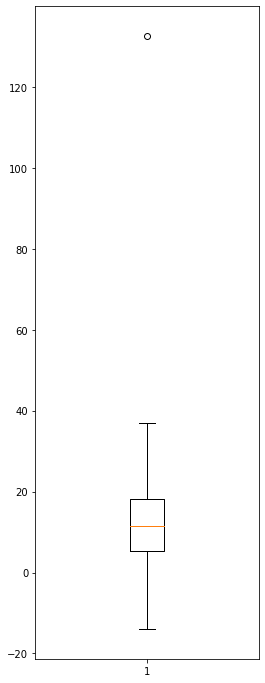

In [13]:
# plot data to get an overview
plt.rcParams['figure.figsize'] = [4, 12]
plt.boxplot(df['temperature'])
plt.show()

In [15]:
# IQR Filter 
# Remove outliers from a dataframe by column.
# Removing rows for which the column value are 
# less than Q1-1.5IQR or greater than Q3+1.5IQR.
def iqr_range_filter(dataframe, column):
    """
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    # Calculate Q1, Q2 and IQR
    q1 = dataframe[column].quantile(0.25)                 
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR
    _filter = (dataframe[column] >= q1 - 1.5*iqr) & (dataframe[column] <= q3 + 1.5*iqr)
    return df.loc[_filter] 

# Apply function
df_filtered_by_iqr = iqr_range_filter(df, 'temperature')
lower = df_filtered_by_iqr.min().temperature
upper = df_filtered_by_iqr.max().temperature
print("IQR boundaries:", lower, "> IQR <", upper)
print("IQR range:", upper - lower)

# filtered dataframe
df_filtered_by_iqr = iqr_range_filter(df, 'temperature')
df_filtered_by_iqr

IQR boundaries: -14.0 > IQR < 36.9
IQR range: 50.9


,temperature
timestamp,
2018-08-10 21:20:00,16.5
2018-08-10 21:30:00,16.4
2018-08-10 21:40:00,16.1
2018-08-10 21:50:00,16.3
2018-08-10 22:00:00,16.3
...,...
2019-09-25 23:10:00,12.7
2019-09-25 23:20:00,12.8
2019-09-25 23:30:00,12.6


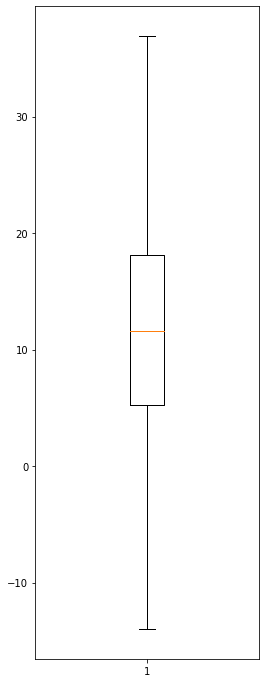

In [16]:
# plot data after IQR filter
plt.rcParams['figure.figsize'] = [4, 12]
plt.boxplot(df_filtered_by_iqr['temperature'])
plt.show()

In [7]:
# Z-Score Filter 
# Remove outliers from a dataframe by column.
# Removing rows for which the column value are 
# less than -3 or greater than 3 in z-standardized data.
# 
def z_score_range_filter(dataframe, column):
    """
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    mean = dataframe[column].mean()
    std = dataframe[column].std()
    lower = mean - 3 * std
    upper = mean + 3 * std
    # Apply filter with respect to IQR
    _filter = (dataframe[column] >= lower) & (dataframe[column] <= upper)
    return df.loc[_filter] 

# Apply function
df_filtered_by_z_score = z_score_range_filter(df, 'temperature')
lower = df_filtered_by_z_score.min().temperature
upper = df_filtered_by_z_score.max().temperature
print("Z-Score boundaries:", lower, "> mue <", upper)
print("Z-Score range:", upper - lower)

# filtered dataframe
df_filtered_by_z_score = z_score_range_filter(df, 'temperature')
df_filtered_by_z_score

Z-Score boundaries: -9.3 > mue < 36.9
Z-Score range: 46.2


,temperature
timestamp,
2018-08-10 21:20:00,16.5
2018-08-10 21:30:00,16.4
2018-08-10 21:40:00,16.1
2018-08-10 21:50:00,16.3
2018-08-10 22:00:00,16.3
2018-08-10 22:10:00,16.4
2018-08-10 22:20:00,16.7
2018-08-10 22:30:00,16.6
2018-08-10 22:40:00,16.1


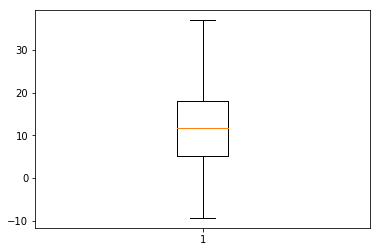

In [8]:
# plot data after IQR filter
plt.boxplot(df_filtered_by_z_score['temperature'])
plt.show()

In [9]:
# Replace outliers with NA values
df['temperature'] = df['temperature'].where(df['temperature'].between(lower, upper))
print(df["temperature"].isna().sum(), "outliers replaced with NaN.")

2 outliers replaced with NaN.


In [10]:
# Fill missing data points with NA's
length = len(df['temperature'])
# resample dataframe 
df_with_nans = df.resample('10Min').asfreq()
number_of_gaps = len(df_with_nans["temperature"]) - length
print(number_of_gaps, "gaps filled with NaN")
#show NaN entrys
df_with_nans[df_with_nans.isna().any(axis=1)]

42 gaps filled with NaN


,temperature
timestamp,
2018-10-19 08:00:00,NaN
2018-11-11 18:30:00,NaN
2018-11-11 18:40:00,NaN
2018-11-11 18:50:00,NaN
2018-11-11 19:00:00,NaN
2018-11-11 19:10:00,NaN
2018-11-11 19:20:00,NaN
2018-11-11 19:30:00,NaN
2018-11-11 19:40:00,NaN


In [11]:
# explore the positions of gaps
gaps = np.where(df_with_nans['temperature'].isna())[0]
split = np.where(np.diff(gaps) > 1)[0] + 1
gaps = np.split(gaps, split)
gaps

[array([10000], dtype=int64),
 array([13375, 13376, 13377, 13378, 13379, 13380, 13381, 13382, 13383,
        13384, 13385, 13386], dtype=int64),
 array([24494, 24495, 24496, 24497, 24498, 24499, 24500, 24501, 24502,
        24503, 24504, 24505, 24506, 24507, 24508, 24509, 24510, 24511,
        24512, 24513, 24514, 24515, 24516, 24517, 24518, 24519, 24520,
        24521], dtype=int64),
 array([40040], dtype=int64),
 array([41217, 41218], dtype=int64)]

In [12]:
for gap in gaps:
    print(df_with_nans.iloc[gap])

                     temperature
timestamp                       
2018-10-19 08:00:00          NaN
                     temperature
timestamp                       
2018-11-11 18:30:00          NaN
2018-11-11 18:40:00          NaN
2018-11-11 18:50:00          NaN
2018-11-11 19:00:00          NaN
2018-11-11 19:10:00          NaN
2018-11-11 19:20:00          NaN
2018-11-11 19:30:00          NaN
2018-11-11 19:40:00          NaN
2018-11-11 19:50:00          NaN
2018-11-11 20:00:00          NaN
2018-11-11 20:10:00          NaN
2018-11-11 20:20:00          NaN
                     temperature
timestamp                       
2019-01-27 23:40:00          NaN
2019-01-27 23:50:00          NaN
2019-01-28 00:00:00          NaN
2019-01-28 00:10:00          NaN
2019-01-28 00:20:00          NaN
2019-01-28 00:30:00          NaN
2019-01-28 00:40:00          NaN
2019-01-28 00:50:00          NaN
2019-01-28 01:00:00          NaN
2019-01-28 01:10:00          NaN
2019-01-28 01:20:00          NaN
2019-01-28

In [13]:
def linear_interpolation(start, end, length):
    return np.linspace(start, end, length)
    
def step_interpolation(start, end, length):
    l = length //2
    return [start]*l + [end]*l

def interpolate(dataframe, column, function):
    gaps = np.where(dataframe[column].isna())[0]
    split = np.where(np.diff(gaps) > 1)[0] + 1
    gaps = np.split(gaps, split)
    l = 0
    
    for gap in gaps:
        length = len(gap)
        start = gap[0] -1
        end = gap[-1] + 1
        last_value = dataframe.iloc[gap[0] -1][0]
        first_value_after_gap = dataframe.iloc[gap[-1] + 1][0]
        l += length
        if length < 2:
            dataframe.iloc[gap[0]] = ((first_value_after_gap + last_value)/2)
            print("\n \n Interpolated value linear between:", 
                  last_value, "and", 
                  first_value_after_gap,  
                  "| number values:", length)
            print(dataframe.iloc[gap])
        else:
            dataframe.iloc[start+1:end,0] = function(last_value, first_value_after_gap, length)
            print("\n \n Interpolated values linear between:", 
                  last_value, "and", 
                  first_value_after_gap,  
                  "| number values:", length)
            print(dataframe.iloc[gap])
    print('\n',l , 'interpolated values.')
    return dataframe

In [14]:
df2 = pd.DataFrame(df_with_nans)
df_interpolated = interpolate(df2, 'temperature', step_interpolation)


 
 Interpolated value linear between: 10.6 and 10.5 | number values: 1
                     temperature
timestamp                       
2018-10-19 08:00:00        10.55

 
 Interpolated values linear between: 9.8 and 10.0 | number values: 12
                     temperature
timestamp                       
2018-11-11 18:30:00          9.8
2018-11-11 18:40:00          9.8
2018-11-11 18:50:00          9.8
2018-11-11 19:00:00          9.8
2018-11-11 19:10:00          9.8
2018-11-11 19:20:00          9.8
2018-11-11 19:30:00         10.0
2018-11-11 19:40:00         10.0
2018-11-11 19:50:00         10.0
2018-11-11 20:00:00         10.0
2018-11-11 20:10:00         10.0
2018-11-11 20:20:00         10.0

 
 Interpolated values linear between: 4.4 and 2.2 | number values: 28
                     temperature
timestamp                       
2019-01-27 23:40:00          4.4
2019-01-27 23:50:00          4.4
2019-01-28 00:00:00          4.4
2019-01-28 00:10:00          4.4
2019-01-28 00:20:00     